In [94]:
import simexpal
import yaml
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics

from scipy.stats import gmean
from num2words import num2words
from pathlib import Path

In [95]:
cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

In [96]:
# Global Variables
save_all_plots=True
write_tex_files=False

# We use PDF output per default, change to False for PNG output
using_pdf = True
plot_filetype = '.pdf' if using_pdf else '.png'

In [97]:
# Colouring
#
# Remember: https://blog.datawrapper.de/colorblindness-part2/

# Thanks to the colorblind10 pallette authors!
# Also thanks to: https://stackoverflow.com/questions/74830439/list-of-color-names-for-matplotlib-style-tableau-colorblind10
plt.style.use('tableau-colorblind10')

class MyColor:
    name = str
    color_html = str
    def __init__(self, n, c):
         self.name = n
         self.color_html = c

def color_code(color : MyColor):
    return '#' + color.color_html

class MyColorPallette():
    dark = MyColor('dark', '002b58')
    grey = MyColor('grey', '2B2B2B')
    lead = MyColor('lead', '00A0B3')
    kk = MyColor('kk', '4F4F4F')
    # kk = MyColor('kk', 'E8E8E8')
    cerulean_blue = MyColor('cerulean_blue', '006BA4')
    pumpkin_orange = MyColor('pumpkin_orange', 'FF800E')
    dark_gray = MyColor('dark_gray', 'ABABAB')
    mortar_grey = MyColor('mortar_grey', '595959')
    picton_blue = MyColor('picton_blue', '5F9ED1' 	)
    tenne_tawny_orange = MyColor('tenne_tawny_orange', 'C85200')
    suva_grey = MyColor('suva_grey', '898989')
    sail_blue = MyColor('sail_blue', 'A2C8EC')
    macaroni_and_cheese_orange = MyColor('macaroni_and_cheese_orange', 'FFBC79')
    very_light_grey = MyColor('very_light_grey', 'CFCFCF')

my_color_pallette = MyColorPallette()

In [98]:
def write_latex_color_pallette(write):
    if write:
        color_pallette_file = 'results/macros/color_pallette.tex'
        os.makedirs(os.path.dirname(color_pallette_file), exist_ok=True)
        with open(color_pallette_file, 'w') as color_pallette_file:
            print('\\definecolor{fw' + my_color_pallette.dark.name + '}{HTML}{' + my_color_pallette.dark.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.grey.name + '}{HTML}{' + my_color_pallette.grey.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.lead.name + '}{HTML}{' + my_color_pallette.lead.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.kk.name + '}{HTML}{' + my_color_pallette.kk.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.cerulean_blue.name + '}{HTML}{' + my_color_pallette.cerulean_blue.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.pumpkin_orange.name + '}{HTML}{' + my_color_pallette.pumpkin_orange.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.dark_gray.name + '}{HTML}{' + my_color_pallette.dark_gray.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.mortar_grey.name + '}{HTML}{' + my_color_pallette.mortar_grey.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.picton_blue.name + '}{HTML}{' + my_color_pallette.picton_blue.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.tenne_tawny_orange.name + '}{HTML}{' + my_color_pallette.tenne_tawny_orange.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.suva_grey.name + '}{HTML}{' + my_color_pallette.suva_grey.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.sail_blue.name + '}{HTML}{' + my_color_pallette.sail_blue.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.macaroni_and_cheese_orange.name + '}{HTML}{' + my_color_pallette.macaroni_and_cheese_orange.color_html + '}', file=color_pallette_file)
            print('\\definecolor{fw' + my_color_pallette.very_light_grey.name + '}{HTML}{' + my_color_pallette.very_light_grey.color_html + '}', file=color_pallette_file)
        

In [99]:
write_latex_color_pallette(write=write_tex_files)

In [100]:
# Names
kk_name = 'KnightKing'
sr_name = 'ScaleRunner'

In [101]:
class OutputKeys:
    graph_file_path = 'graph_file_path'
    experiment_name = 'experiment_name'
    thread_count = 'thread_count'
    graph_name = 'graph_name'
    edge_count = 'edge_count_in'
    directed_edge_count = 'edge_count_out'
    vertex_count = 'vertex_count_in'
    output_duration = 'output_duration'
    experiment_duration = 'experiment_duration'
    g_category = 'graph_category'

    random_walk_length = 'random_walk_length'
    random_walk_count = 'random_walk_count'
    mem_before_read = 'mem_before_graph_read_operation_global'
    mem_after_read = 'mem_after_graph_read_operation_global'
    mem_after = 'mem_after_rw_global'

outputKeys = OutputKeys()

In [102]:
def abbreviate_name(graph_name):
    d = {
        'a-stackexch-user-marks-post-und': 'stackexch',
        'Amazon0601': 'Amzn0601',
        'aves-barn-swallow-non-physical': 'aves-barn',
        'bn-human-Jung2015_M87125334': 'hmn-Jung-MX5334',
        'bn-human-Jung2015_M87126525': 'hmn-Jung-MX6525',
        'cage14': 'cage14',
        'cit-Patents': 'patents',
        'com-friendster': 'friendster',
        'com-orkut': 'orkut',
        'dimacs10-uk-2007-05': 'uk2007',
        'europe_osm': 'europe_osm',
        'facebook_combined': 'facebook',
        'human_gene2': 'human_gene2',
        'ia-stackexch-user-marks-post-und': 'stackexch',
        'inf-road-usa': 'road-usa',
        'kron_g500-logn21': 'kron_g500',
        'power-bcspwr10': 'power',
        'rec-amazon-ratings': 'amzn-ratings',
        'rec-epinions-user-ratings': 'epns-user',
        'roadNet-CA': 'roadNet',
        'rt-retweet-crawl': 'retweet',
        'Slashdot0811': 'Slashdot',
        'soc-epinions-trust-dir': 'epns-trust',
        'soc-orkut': 'orkut',
        'soc-Epinions1': 'Epinions',
        'soc-flickr-growth': 'flickr',
        'soc-LiveJournal1': 'LiveJournal',
        'soc-twitter-mpi-sws': 'twitter-mpi',
        'soc-youtube-growth': 'youtube',
        'sx-stackoverflow': 'stackoverflow',
        'tech-p2p': 'tech-p2p',
        'web-BerkStan': 'BerkStan',
        'web-ClueWeb09': 'ClueWeb09',
        'web-Google': 'Google',
        'web-NotreDame': 'NotreDame',
        'web-sk-2005-all': 'web-sk-2005',
        'web-uk-2005': 'web-uk2005',
        'web-uk-2005-all': 'web-uk-2005-all',
        'web-wikipedia_link_en13': 'wiki-link',
        'wiki-talk-temporal': 'wiki-temp',
        'wiki-Talk': 'wiki',
        'wiki-topcats': 'topcats',
        'wiki-Vote': 'wiki-Vote'
    }
    
    if graph_name in d:
        return d[graph_name]
    else:
        print('No abbreviation found for graph name: ', graph_name)
        return graph_name

In [103]:
def abbreveations(graphs):
    return [abbreviate_name(g) for g in graphs]

In [104]:
# Taken from https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings-in-python
# Thanks to rtaft
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [105]:
def compose_filename(folder, filename):
    fname = folder + '/' + filename
    fname += plot_filetype
    os.makedirs(os.path.dirname(fname), exist_ok=True)
    return fname

In [106]:
def extractExpFilter(filter, key, sort_by):
    res = []
    for r in sorted(results, key=lambda line: line[sort_by]):
        filter_result = False
        for k, label in filter:
            if (r[k] != label):
                filter_result = True
            if filter_result:
                break
                
        if filter_result:
            continue

        res.append(r[key])
    return res

In [107]:
def extractExp(experiment, key, sort_by):
    res = []
    for r in sorted(results, key=lambda line: line[sort_by]):
        if r[outputKeys.experiment_name] != experiment:
            continue
        res.append(r[key])
    return res

In [108]:
def remove_dot_data(graph_name):
    return Path(graph_name).stem

In [109]:
graph_category_list = ['social', 'biological', 'web', 'road', 'collaboration']

def choose_graph_color(category):
    if category == 'road':
        return my_color_pallette.tenne_tawny_orange
    if category == 'social':
        return my_color_pallette.suva_grey
    if category == 'web':
        return my_color_pallette.sail_blue
    if category == 'biological':
        return my_color_pallette.macaroni_and_cheese_orange
    if category == 'collaboration':
        return my_color_pallette.very_light_grey

def choose_graph_color_code(category):
    return color_code(choose_graph_color(category))
    
graph_categories_colors = [choose_graph_color(c) for c in graph_category_list]
graph_categories_color_codes = [choose_graph_color_code(c) for c in graph_category_list]

In [110]:
def graph_category_legend(loc):   
    custom_lines = list()
    for cat in graph_category_list:
        custom_lines.append(plt.Line2D([0], [0], color=choose_graph_color_code(cat), linestyle='-', linewidth=3))
    
    coloring_legend = plt.legend(custom_lines, graph_category_list, title='Graph Categories', loc=loc, framealpha=1)
    plt.gca().add_artist(coloring_legend)

In [111]:
def graphanalysis_degree_dist(save=False):
    experiment_name = 'graphanalysis'

    sort_by = 'edge_count_in'
    key = 'degree_degree_distribution'

    filter = [(outputKeys.experiment_name, experiment_name)]
    deg_dist_complex = extractExpFilter(filter, key=key, sort_by=sort_by)
    graph_names = extractExpFilter(filter, key=outputKeys.graph_name, sort_by=sort_by)
    graph_names = abbreveations([remove_dot_data(name) for name in graph_names])
    graph_categories = extractExpFilter(filter, key='graph_category', sort_by=sort_by)

    data_point_count = extractExpFilter(filter, key='data_point_count', sort_by=sort_by)
    data_point_count = data_point_count[0]

    fig, ax = plt.subplots()

    for i in np.arange(len(graph_names)):
        x = np.arange(len(deg_dist_complex[i]))
        d = deg_dist_complex[i]

        graph_category = graph_categories[i]
        graph_color = choose_graph_color_code(graph_category)
        ax.plot(x, d, label=graph_names[i], alpha=1, linestyle='-', color=graph_color, linewidth=3., antialiased=True)

    ax.set_ylabel('deg')
    ax.set_xlabel('V')
    ax.set_yscale('log', base=10)

    max_degree_label = r'$\max_{\deg}$'
    min_degree_label = r'$\min_{\deg}$'

    ax.set_xticks([0, data_point_count])
    ax.set_xticklabels([max_degree_label, min_degree_label])
    
    ax.grid(which='major', linestyle=':', color='grey')

    graph_category_legend('upper center')

    if save:
       title = 'degree_distribution'
       filename = compose_filename('results/plots', title)
       plt.savefig(filename, bbox_inches='tight')
    else:
       plt.show()  

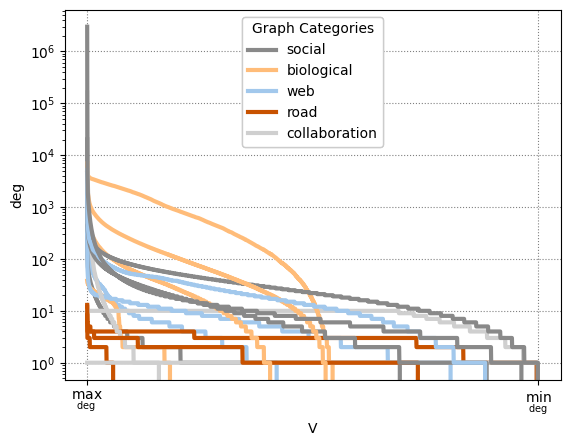

In [112]:
graphanalysis_degree_dist(save=save_all_plots)

In [113]:
def latex_format(text):
    for c in text:
        if c == '_':
            text = text.replace(c,"\\_")
    return text

In [114]:
def graph_origin(graph_name):
    snap = 'SNAP'
    nr = 'NR'

    d = {
        'Amazon0601': snap,
        'aves-barn-swallow-non-physical': nr,
        'bn-human-Jung2015_M87125334': nr,
        'bn-human-Jung2015_M87126525': nr,
        'cage14': nr,
        'com-friendster': snap,
        'europe_osm': nr,
        'facebook_combined': snap,
        'human_gene2': nr,
        'inf-road-usa': nr,
        'kron_g500-logn21': nr,
        'power-bcspwr10': nr,
        'rec-amazon-ratings': nr,
        'rec-epinions-user-ratings': nr,
        'roadNet-CA': snap,
        'rt-retweet-crawl': nr,
        'Slashdot0811': snap,
        'soc-Epinions1': snap,
        'soc-LiveJournal1': snap,
        'soc-orkus': nr,
        'soc-twitter-mpi-sws': nr,
        'web-ClueWeb09': nr,
        'web-Google': snap,
        'web-NotreDame': snap,
        'web-uk-2005-all': nr,
        'wiki-Vote': snap,
        'soc-orkut': nr
    }
    
    if graph_name in d:
        return d[graph_name]
    else:
        print('No origin found for graph name: ', graph_name)
        return 'uknown'

In [115]:
class GraphProperty:
    name : str
    name_latex : str
    synonym : str
    synonym_latex : str
    origin : str
    category : str
    category_color : str
    vertex_count : int
    edge_count : int
    max_deg : int
    mean_deg : int
    density : int

In [116]:
def directed_graph_density(vertex_count, edge_count):
    return edge_count / (vertex_count * (vertex_count-1))

In [117]:
def graph_summary():
    sort_by = outputKeys.edge_count
    filter = [(outputKeys.experiment_name, 'graphanalysis')]
    graph_names = extractExpFilter(filter=filter, key=outputKeys.graph_name, sort_by=sort_by)
    graph_names = [remove_dot_data(g) for g in graph_names]
    graph_abbreviations = abbreveations(graphs=graph_names)
    graph_categories = extractExpFilter(filter=filter, key='graph_category', sort_by=sort_by)

    graph_names_latex = [latex_format(g) for g in graph_names]
    graph_abbreviations_latex = [latex_format(g) for g in graph_abbreviations]

    vertex_counts = extractExpFilter(filter=filter, key=outputKeys.vertex_count, sort_by=sort_by)
    edge_counts = extractExpFilter(filter=filter, key=outputKeys.directed_edge_count, sort_by=sort_by)
    max_degrees = extractExpFilter(filter=filter, key='max_degree', sort_by=sort_by)
    mean_degrees = extractExpFilter(filter=filter, key='mean_degree', sort_by=sort_by)
    graph_origins = [graph_origin(g) for g in graph_names]
    density = [directed_graph_density(n, m) for n, m in zip(vertex_counts, edge_counts)]
    
    properties = list()
    for i in range(0, len(vertex_counts)):
        p = GraphProperty()
        p.name = graph_names[i]
        p.name_latex = graph_names_latex[i]
        p.synonym = graph_abbreviations[i]
        p.synonym_latex = graph_abbreviations_latex[i]
        p.category = graph_categories[i]
        p.category_color = choose_graph_color(graph_categories[i]).name
        p.vertex_count = vertex_counts[i]
        p.edge_count = edge_counts[i]
        p.max_deg = max_degrees[i]
        p.mean_deg = mean_degrees[i]
        p.origin = graph_origins[i]
        p.density = density[i]

        properties.append(p)

    return properties    

In [118]:
def write_graph_summary_to_file(save=save_all_plots):
    if save:
        graph_summary_file = 'results/tables/graph_summary.tex'
        os.makedirs(os.path.dirname(graph_summary_file), exist_ok=True)
        with open('results/tables/graph_summary.tex', 'w') as graph_summary_file:
            graphs = graph_summary()
            print('\\begin{tabular}{|l|l|l|l|c|r|r|r|r|l|}', file=graph_summary_file)
            print('\\hline', file=graph_summary_file)
            print('Name & Synonym & Origin & Category & Color & $n$ & $m$ & $\\deg^+_{\\max}$ & $\\overline{\\deg^+}$ & $\\rho(G)$ \\\\', file=graph_summary_file)
            print('\\hline', file=graph_summary_file)
            for g in graphs:
                print(g.name_latex + ' & ' + g.synonym_latex + ' & ' + g.origin + ' & ' + g.category + ' & ' + '\\textcolor{fw' + g.category_color + '}{\\rule{1.5ex}{1.5ex}}' + ' & ' + human_format(g.vertex_count) + ' & ' + human_format(g.edge_count) + ' & ' + human_format(g.max_deg) + ' & ' + human_format(g.mean_deg) + ' & ' + "{:.3e}".format(g.density) + '\\\\', file=graph_summary_file)
            print('\\hline', file=graph_summary_file)
            print('\\end{tabular}', file=graph_summary_file)

In [119]:
write_graph_summary_to_file(save=write_tex_files)

In [120]:
def graph_data(save=False):
   experiment_name = 'graphanalysis'

   sort_by = 'edge_count_in'

   filter = [(outputKeys.experiment_name, experiment_name)]
   mean_deg = extractExpFilter(filter, key='mean_degree', sort_by=sort_by)
   max_deg = extractExpFilter(filter, key='max_degree', sort_by=sort_by)
   edge_count = extractExpFilter(filter, key=outputKeys.directed_edge_count, sort_by=sort_by)
   vertex_count = extractExpFilter(filter, key='vertex_count_in', sort_by=sort_by)

   graph_names = extractExpFilter(filter, key=outputKeys.graph_name, sort_by=sort_by)

   graph_names = abbreveations([remove_dot_data(name) for name in graph_names])

   weighted_filter = [(outputKeys.experiment_name, experiment_name), ('graph_weighted', 1)]
   weighted_graphs = extractExpFilter(weighted_filter, key=outputKeys.graph_name, sort_by=sort_by)
   weighted_graphs = abbreveations([remove_dot_data(name) for name in weighted_graphs])
   print(weighted_graphs)

   fig, ax = plt.subplots()
   ax.set_yscale('log', base=10)

   x = np.arange(len(graph_names))
   ax.set_xticks(x)
   ax.set_xticklabels(graph_names, rotation=90)

   for ticklabel in ax.get_xticklabels():
      if ticklabel.get_text() in weighted_graphs:
         ticklabel.set_backgroundcolor(color_code(my_color_pallette.lead))
         ticklabel.set_color('black')

   ax.scatter(x, max_deg, label=r'$\deg_{\max}$', color='black', marker='v', s=50, linewidths=1)
   ax.scatter(x, mean_deg, label=r'$\overline{\deg}$', color='black', marker='_', s=70, linewidths=2)
   ax.scatter(x, edge_count, label=r'$m$', s=70, color='black', marker=r'$m$', linewidths=0.6)
   ax.scatter(x, vertex_count, label=r'$n$', color='black', marker=r'$n$', linewidths=0.6)

   # sets the grid to the background!
   ax.set_axisbelow(True)
   ax.grid(which='major', linestyle=':', color='grey')
   ax.legend(loc='lower right')

   if save:
      title = 'graph_data'
      filename = compose_filename('results/plots', title)
      plt.savefig(filename, bbox_inches='tight')
   else:
      plt.show()  

['cage14', 'human_gene2', 'amzn-ratings', 'epns-user']


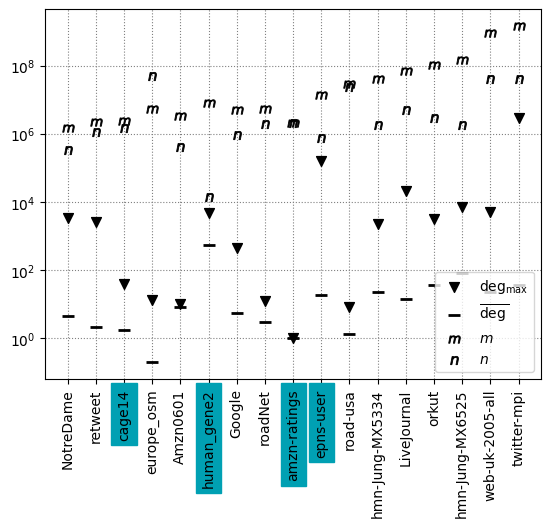

In [121]:
graph_data(save=save_all_plots)

In [122]:
def find_indices_of_missing_graphs(graph_names_sr, graph_names_kk):
    sr_range = range(0, len(graph_names_sr))
    kk_index = 0
    kk_max_index = len(graph_names_kk) - 1
    indices = []

    for sr_i in sr_range:
       if graph_names_sr[sr_i] != graph_names_kk[kk_index]:
           indices.append(sr_i)
       elif kk_index < kk_max_index:
           kk_index = kk_index + 1

    return indices
           

In [123]:
def insert_missing(list: list, replacement, graph_names, graph_names_kk):
    indices = find_indices_of_missing_graphs(graph_names, graph_names_kk)
    for i in indices:
       if i < len(list):
         list.insert(i, replacement)
       else:
         list.append(replacement)

    return list

In [124]:
def rw_per_ms(ms_set, rw_counts):
    return [(random_walk_count / t) for t, random_walk_count in zip(ms_set, rw_counts)]

In [125]:
def crw_rw_per_ms(save=False):
   experiment_name = 'scalerunner-crw'
   title = experiment_name

   sort_by = outputKeys.edge_count

   random_walks_count = extractExp(experiment=experiment_name, key=outputKeys.random_walk_count, sort_by=sort_by)
   graph_names = extractExp(experiment=experiment_name, key=outputKeys.graph_name, sort_by=sort_by)

   sr_ms = extractExp(experiment=experiment_name, key=outputKeys.experiment_duration, sort_by=sort_by)
   kk_ms = extractExp(experiment='kk-crw', key=outputKeys.experiment_duration, sort_by=sort_by)
   sr_ms = [1 if t == 0 else t for t in sr_ms]

   rw_per_ms_sr = rw_per_ms(sr_ms, random_walks_count)
   rw_per_ms_kk = rw_per_ms(kk_ms, random_walks_count)

   graph_names_kk = extractExp(experiment='kk-crw', key=outputKeys.graph_name, sort_by=sort_by)
   rw_per_ms_kk = insert_missing(rw_per_ms_kk, 0, graph_names, graph_names_kk)

   fig, ax = plt.subplots()
   ax.set_ylabel('rw per ms')

   x = np.arange(len(graph_names))
   width = 0.32

   graph_names = abbreveations([remove_dot_data(name) for name in graph_names])

   ax.set_xticks(x)
   ax.set_xticklabels(graph_names, rotation=90)

   kk_experiment_available = [duration != 0 for duration in rw_per_ms_kk]
   for ticklabel, available in zip(ax.get_xticklabels(), kk_experiment_available):
      if not available:
         ticklabel.set_backgroundcolor(color_code(my_color_pallette.dark_gray))

         ticklabel.set_color('black')

   ax.bar(x - 0.5 * width, rw_per_ms_kk, width, label='KnightKing', color=color_code(my_color_pallette.kk), edgecolor='black', align='center')
   ax.bar(x + 0.5 * width, rw_per_ms_sr, width, label='ScaleRunner', color=color_code(my_color_pallette.lead), edgecolor='black', align='center')

   # sets the grid to the background!
   ax.set_axisbelow(True)
   ax.grid(which='both', linestyle=':', color='grey')

   ax.set_yscale('log', base=10)
   ax.legend()

   if save:
      title = 'crw_rw_per_ms'
      filename = compose_filename('results/plots', title)
      plt.savefig(filename, bbox_inches='tight')
   else:
      plt.show()  

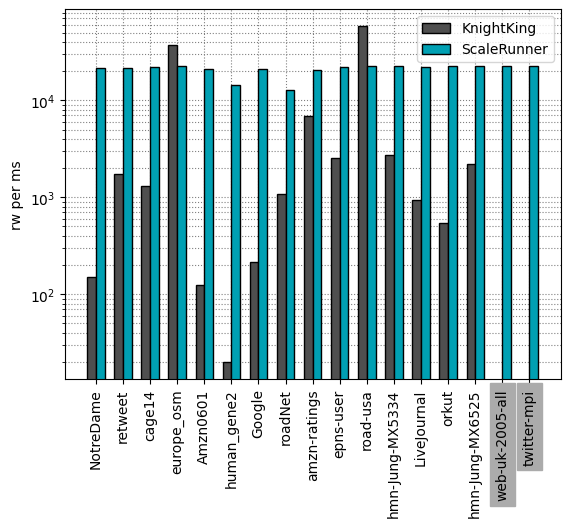

In [126]:
crw_rw_per_ms(save=save_all_plots)

In [127]:
def speedup_crw(save=False):
   experiment_name = 'scalerunner-crw'
   title = experiment_name

   sort_by = outputKeys.edge_count
   
   random_walks_count = extractExp(experiment=experiment_name, key=outputKeys.random_walk_count, sort_by=sort_by)
   random_walks_count_kk = extractExp(experiment='kk-crw', key=outputKeys.random_walk_count, sort_by=sort_by)
   graph_names = extractExp(experiment=experiment_name, key=outputKeys.graph_name, sort_by=sort_by)

   sr_ms = extractExp(experiment=experiment_name, key=outputKeys.experiment_duration, sort_by=sort_by)
   sr_ms = [1 if t == 0 else t for t in sr_ms]
   kk_ms = extractExp(experiment='kk-crw', key=outputKeys.experiment_duration, sort_by=sort_by)

   rw_per_ms_sr = rw_per_ms(sr_ms, random_walks_count)
   rw_per_ms_kk = rw_per_ms(kk_ms, random_walks_count_kk)

   graph_names_kk = extractExp(experiment='kk-crw', key=outputKeys.graph_name, sort_by=sort_by)
   indices = find_indices_of_missing_graphs(graph_names, graph_names_kk)
   rw_per_ms_sr = [i for j, i in enumerate(rw_per_ms_sr) if j not in indices]

   speedup = [sr_time / kk_time for sr_time, kk_time in zip(rw_per_ms_sr, rw_per_ms_kk)]

   graph_categories = extractExp(experiment='scalerunner-crw', key=outputKeys.g_category, sort_by=sort_by)

   fig, ax = plt.subplots()
   ax.set_ylabel('Algorithmic Speedup: ScaleRunner vs KnightKing')

   graph_names = abbreveations([remove_dot_data(name) for name in graph_names])
   x = np.arange(len(graph_names))
   width = 0.3

   ax.set_xticks(x)
   ax.set_xticklabels(graph_names, rotation=90)

   for i in range(len(speedup)):
      ax.bar(x[i], speedup[i], width, color=choose_graph_color_code(graph_categories[i]), align='center', edgecolor='black')

   ax.set_yscale('log', base=10)

   # sets the grid to the background!
   ax.set_axisbelow(True)
   ax.grid(which='both', linestyle=':', color='grey')

   graph_category_legend('upper right')

   ax.set_xticks(x)
   ax.yaxis.set_major_formatter(plt.ScalarFormatter())

   if save:
      title = 'speedup_crw'
      filename = compose_filename('results/plots', title)
      plt.savefig(filename, bbox_inches='tight')
   else:
      plt.show()  

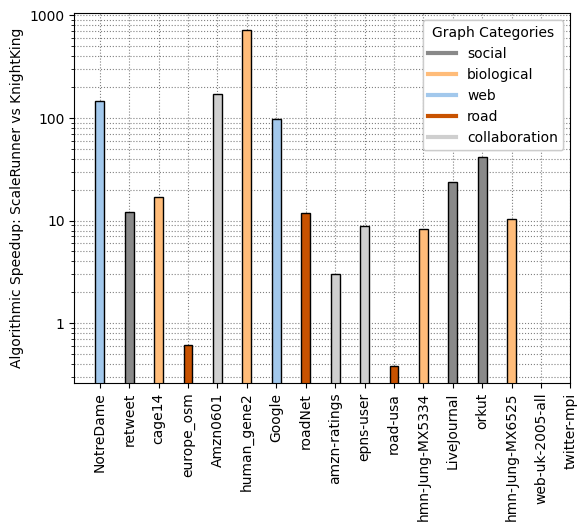

In [128]:
speedup_crw(save=save_all_plots)

In [129]:
def node2vec_rw_per_ms(save=False, q_in_out=2.):
   experiment_name = 'scalerunner-node2vec'
   title = experiment_name

   sort_by = outputKeys.edge_count

   filter = [(outputKeys.experiment_name, experiment_name), ('q_in_out', q_in_out)]
   random_walks_count = extractExpFilter(filter, key=outputKeys.random_walk_count, sort_by=sort_by)
   graph_names = extractExpFilter(filter, key=outputKeys.graph_name, sort_by=sort_by)
   sr_ms = extractExpFilter(filter, key=outputKeys.experiment_duration, sort_by=sort_by)
   sr_ms = [1 if t == 0 else t for t in sr_ms]

   filter = [(outputKeys.experiment_name, 'kk-node2vec'), ('q_in_out', q_in_out)]
   kk_ms = extractExpFilter(filter, key=outputKeys.experiment_duration, sort_by=sort_by)

   rw_per_ms_sr = rw_per_ms(sr_ms, random_walks_count)
   rw_per_ms_kk = rw_per_ms(kk_ms, random_walks_count)

   graph_names_kk = extractExpFilter(filter, key=outputKeys.graph_name, sort_by=sort_by)
   rw_per_ms_kk = insert_missing(rw_per_ms_kk, 0, graph_names, graph_names_kk)

   fig, ax = plt.subplots()
   ax.set_ylabel('rw per ms')

   x = np.arange(len(graph_names))
   width = 0.32

   ax.set_xticks(x)

   graph_names = abbreveations([remove_dot_data(name) for name in graph_names])
   ax.set_xticklabels(graph_names, rotation=90)

   kk_experiment_available = [duration != 0 for duration in rw_per_ms_kk]
   for ticklabel, available in zip(ax.get_xticklabels(), kk_experiment_available):
      if not available:
         ticklabel.set_backgroundcolor(color_code(my_color_pallette.dark_gray))
         ticklabel.set_color('black')

   ax.bar(x - 0.5 * width, rw_per_ms_kk, width, label='KnightKing', color=color_code(my_color_pallette.kk), edgecolor='black', align='center')
   ax.bar(x + 0.5 * width, rw_per_ms_sr, width, label='ScaleRunner', color=color_code(my_color_pallette.lead), edgecolor='black', align='center')

   ax.set_xticks(x)
   ax.set_yscale('log', base=10) 

   # sets the grid to the background!
   ax.set_axisbelow(True)
   ax.grid(which='both', linestyle=':', color='grey')
   
   ax.legend()

   if save:
      title = 'node2vec_rw_per_ms-q' + str(q_in_out)
      filename = compose_filename('results/plots', title)
      plt.savefig(filename, bbox_inches='tight')
   else:
      plt.show()  

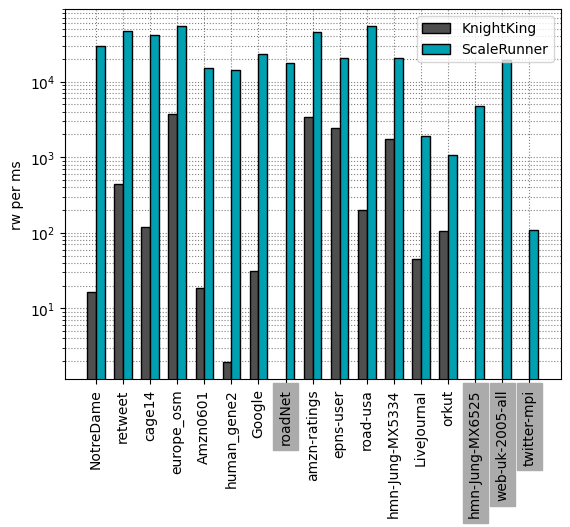

In [130]:
node2vec_rw_per_ms(save=save_all_plots, q_in_out=2)

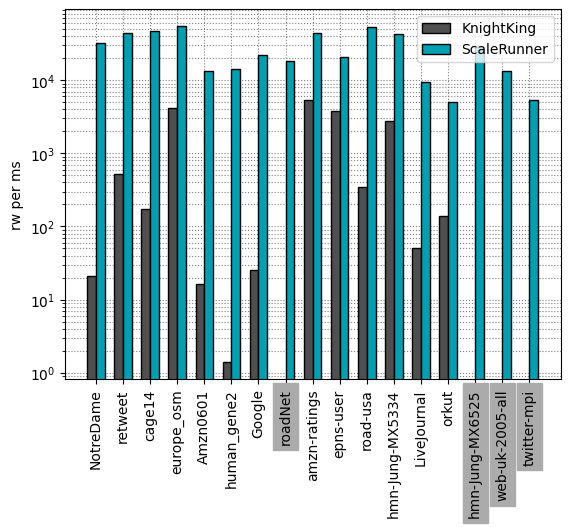

In [131]:
node2vec_rw_per_ms(save=save_all_plots, q_in_out=.5)

In [132]:
def speedup_node2vec(save=False, q_in_out=2.):
   experiment_name = 'scalerunner-node2vec'
   title = experiment_name

   sort_by = outputKeys.edge_count

   filter = [(outputKeys.experiment_name, experiment_name), ('q_in_out', q_in_out)]
   random_walks_count = extractExpFilter(filter, key=outputKeys.random_walk_count, sort_by=sort_by)
   graph_names_sr = extractExpFilter(filter, key=outputKeys.graph_name, sort_by=sort_by)
   graph_categories = extractExpFilter(filter, key=outputKeys.g_category, sort_by=sort_by)

   sr_ms = extractExpFilter(filter, key=outputKeys.experiment_duration, sort_by=sort_by)
   sr_ms = [1 if t == 0 else t for t in sr_ms]
   
   filter = [(outputKeys.experiment_name, 'kk-node2vec'), ('q_in_out', q_in_out)]
   random_walks_count_kk = extractExpFilter(filter, key=outputKeys.random_walk_count, sort_by=sort_by)
   kk_ms = extractExpFilter(filter, key=outputKeys.experiment_duration, sort_by=sort_by)

   rw_per_ms_sr = rw_per_ms(sr_ms, random_walks_count)
   rw_per_ms_kk = rw_per_ms(kk_ms, random_walks_count_kk)

   graph_names_kk = extractExpFilter(filter, key=outputKeys.graph_name, sort_by=sort_by)
   indices = find_indices_of_missing_graphs(graph_names_sr, graph_names_kk)
   rw_per_ms_sr = [i for j, i in enumerate(rw_per_ms_sr) if j not in indices]
   graph_categories = [i for j, i in enumerate(graph_categories) if j not in indices]

   speedup = [sr_count / kk_count for sr_count, kk_count in zip(rw_per_ms_sr, rw_per_ms_kk)]

   fig, ax = plt.subplots()
   ax.set_ylabel('Algorithmic Speedup: ScaleRunner vs KnightKing')

   graph_names = abbreveations([remove_dot_data(name) for name in graph_names_kk])
   x = np.arange(len(graph_names))
   width = 0.3

   ax.set_xticks(x)
   ax.set_xticklabels(graph_names, rotation=90)
  
   for i in range(len(speedup)):
      ax.bar(x[i], speedup[i], width, color=choose_graph_color_code(graph_categories[i]), align='center', edgecolor='black')

   ax.set_yscale('log', base=10)

   # sets the grid to the background!
   ax.set_axisbelow(True)
   ax.grid(which='both', linestyle=':', color='grey')

   graph_category_legend('upper right')

   ax.set_xticks(x)
   ax.yaxis.set_major_formatter(plt.ScalarFormatter())

   if save:
      title = 'speedup_node2vec_q-' + str(q_in_out)
      filename = compose_filename('results/plots', title)
      
      plt.savefig(filename, bbox_inches='tight')
   else:
      plt.show()  

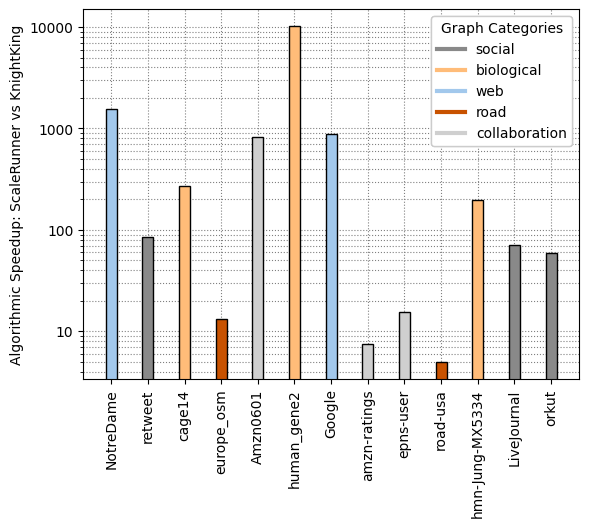

In [133]:
speedup_node2vec(save=save_all_plots, q_in_out=0.5)

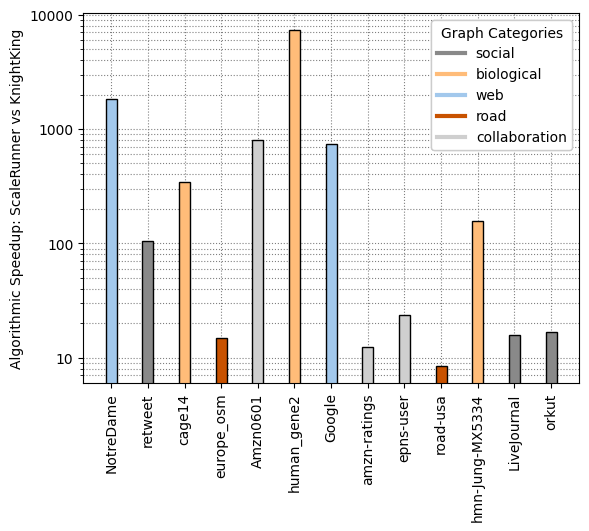

In [134]:
speedup_node2vec(save=save_all_plots, q_in_out=2)

In [135]:
def speedup_sr_vs_kk_geometric(sr_filter, kk_filter, sort_by):
    random_walks_count_sr = extractExpFilter(sr_filter, key=outputKeys.random_walk_count, sort_by=sort_by)
    random_walks_count_kk = extractExpFilter(kk_filter, key=outputKeys.random_walk_count, sort_by=sort_by)
    graph_names_sr = extractExpFilter(sr_filter, key=outputKeys.graph_name, sort_by=sort_by)

    sr_ms = extractExpFilter(sr_filter, key=outputKeys.experiment_duration, sort_by=sort_by)
    sr_ms = [1 if t == 0 else t for t in sr_ms]

    kk_ms = extractExpFilter(kk_filter, key=outputKeys.experiment_duration, sort_by=sort_by)

    rw_per_ms_sr = rw_per_ms(sr_ms, random_walks_count_sr)
    rw_per_ms_kk = rw_per_ms(kk_ms, random_walks_count_kk)

    graph_names_kk = extractExpFilter(kk_filter, key=outputKeys.graph_name, sort_by=sort_by)
    indices = find_indices_of_missing_graphs(graph_names_sr, graph_names_kk)
    rw_per_ms_sr = [duration for j, duration in enumerate(rw_per_ms_sr) if j not in indices]
    random_walks_count_sr = [rw_count for j, rw_count in enumerate(random_walks_count_sr) if j not in indices]

    speedup = [sr_count / kk_count for sr_count, kk_count in zip(rw_per_ms_sr, rw_per_ms_kk)]

    return statistics.geometric_mean(speedup)

In [136]:
def speedup_sr_vs_kk_arithmetic(sr_filter, kk_filter, sort_by):
   sr_ms = extractExpFilter(sr_filter, key=outputKeys.experiment_duration, sort_by=sort_by)
   sr_ms = [1 if t == 0 else t for t in sr_ms]

   graph_names_kk = extractExpFilter(kk_filter, key=outputKeys.graph_name, sort_by=sort_by)
   graph_names_sr = extractExpFilter(sr_filter, key=outputKeys.graph_name, sort_by=sort_by)
   missing_indices_kk = find_indices_of_missing_graphs(graph_names_sr, graph_names_kk)
   sr_ms = [time for idx, time in enumerate(sr_ms) if idx not in missing_indices_kk]

   kk_ms = extractExpFilter(kk_filter, key=outputKeys.experiment_duration, sort_by=sort_by)

   total_duration_sr_ms = sum(sr_ms) 

   total_duration_kk_ms = sum(kk_ms) 

   return total_duration_kk_ms / total_duration_sr_ms if total_duration_sr_ms > 0 else total_duration_kk_ms

In [137]:
def append_to_factor_file(name, speedup):
    rounded_speedup = round(speedup,1)
    with open('results/macros/comparing_factors.tex', 'a') as factor_file:
        print('\\newcommand{\\' + name + '}{' + str(rounded_speedup) + '}', file=factor_file)

In [138]:
def speedup_per_rw(save=False):
   title = 'sr vs kk speedup'
   sort_by = outputKeys.edge_count

   sr_filter = [(outputKeys.experiment_name, 'scalerunner-crw')]
   kk_filter = [(outputKeys.experiment_name, 'kk-crw')]
   speedup_crw_geometric = speedup_sr_vs_kk_geometric(sr_filter, kk_filter, sort_by) 
   speedup_crw_arithmetic = speedup_sr_vs_kk_arithmetic(sr_filter, kk_filter, sort_by) 

   q_in_out = 2
   sr_filter = [(outputKeys.experiment_name, 'scalerunner-node2vec'), ('q_in_out', q_in_out)]
   kk_filter = [(outputKeys.experiment_name, 'kk-node2vec'), ('q_in_out', q_in_out)]
   speedup_n2v_q2_geometric = speedup_sr_vs_kk_geometric(sr_filter, kk_filter, sort_by) 
   speedup_n2v_q2_arithmetic = speedup_sr_vs_kk_arithmetic(sr_filter, kk_filter, sort_by) 

   q_in_out = .5
   sr_filter = [(outputKeys.experiment_name, 'scalerunner-node2vec'), ('q_in_out', q_in_out)]
   kk_filter = [(outputKeys.experiment_name, 'kk-node2vec'), ('q_in_out', q_in_out)]
   speedup_n2v_q_dot5_geometric = speedup_sr_vs_kk_geometric(sr_filter, kk_filter, sort_by) 
   speedup_n2v_q_dot5_arithmetic = speedup_sr_vs_kk_arithmetic(sr_filter, kk_filter, sort_by) 

   speedups_geometric = [speedup_crw_geometric, speedup_n2v_q2_geometric, speedup_n2v_q_dot5_geometric]
   speedups_arithmetic = [speedup_crw_arithmetic, speedup_n2v_q2_arithmetic, speedup_n2v_q_dot5_arithmetic]

   fig, ax = plt.subplots()
   ax.set_ylabel('Algorithmic Speedup: ScaleRunner vs KnightKing')

   experiment_names = [r'$CRW$', r'${node2vec}_{p,q}(1, 2)$', r'${node2vec}_{p,q}(1, \frac{1}{2})$']
   x = np.arange(len(experiment_names))
   width = 0.2

   ax.set_xticks(x)
   ax.set_xticklabels(experiment_names, rotation=0)

   bars = ax.bar(x - 0.5 * width, speedups_geometric, width, color=color_code(my_color_pallette.lead), align='center', edgecolor='black', label='geometric')

   for bar in bars:
      speedup = bar.get_height()
      speedup_rounded = round(speedup, 1)
      x_position = bar.get_x() + width * .5
      y_position = speedup + 1 if speedup > 10 else speedup + 0.1
      plt.text(x_position, y_position, speedup_rounded, horizontalalignment='center', fontweight='regular')    


   bars = ax.bar(x + 0.5 * width, speedups_arithmetic, width, color=color_code(my_color_pallette.grey), align='center', edgecolor='black', label='arithmetic')

   for bar in bars:
      speedup = bar.get_height()
      speedup_rounded = round(speedup, 1)
      x_position = bar.get_x() + width * .5
      y_position = speedup + 1 if speedup > 10 else speedup + 0.1
      plt.text(x_position, y_position, speedup_rounded, horizontalalignment='center', fontweight='regular')    


   ax.legend()
   ax.set_axisbelow(True)
   ax.grid(which='both', linestyle=':', color='grey')

   ax.set_xticks(x)
   ax.set_yticks(ax.get_yticks())
   ax.yaxis.set_major_formatter(plt.ScalarFormatter())

   if save:
      title = 'speedups_summary'
      filename = compose_filename('results/plots', title)
      plt.savefig(filename, bbox_inches='tight')

      if write_tex_files:
         append_to_factor_file('speedupCRWGeometric', speedup_crw_geometric)
         append_to_factor_file('speedupNTVqTwoGeometric', speedup_n2v_q2_geometric)
         append_to_factor_file('speedupNTVqdotFiveGeometric', speedup_n2v_q_dot5_geometric)

         append_to_factor_file('speedupCRWArithmetic', speedup_crw_arithmetic)
         append_to_factor_file('speedupNTVqTwoArithmetic', speedup_n2v_q2_arithmetic)
         append_to_factor_file('speedupNTVqdotFiveArithmetic', speedup_n2v_q_dot5_arithmetic)
   else:
      plt.show() 

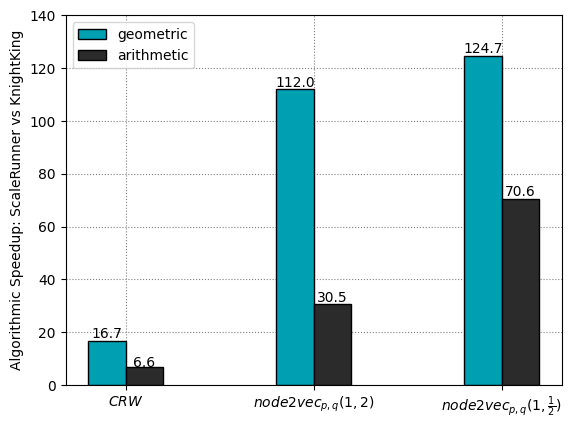

In [139]:
speedup_per_rw(save=save_all_plots)

In [140]:
def strong_scaling(save=False):
   sort_by = outputKeys.edge_count

   sc1_filter = [(outputKeys.experiment_name, 'scalerunner-scaling1')]
   sc2_filter = [(outputKeys.experiment_name, 'scalerunner-scaling2')]
   sc4_filter = [(outputKeys.experiment_name, 'scalerunner-scaling4')]
   sc8_filter = [(outputKeys.experiment_name, 'scalerunner-scaling8')]
   sc16_filter = [(outputKeys.experiment_name, 'scalerunner-scaling16')]

   speedup_sc2_total = speedup_sr_vs_kk_arithmetic(sc2_filter, sc1_filter, sort_by)
   speedup_sc4_total = speedup_sr_vs_kk_arithmetic(sc4_filter, sc1_filter, sort_by)
   speedup_sc8_total = speedup_sr_vs_kk_arithmetic(sc8_filter, sc1_filter, sort_by)
   speedup_sc16_total = speedup_sr_vs_kk_arithmetic(sc16_filter, sc1_filter, sort_by)

   speedup_total = [1, speedup_sc2_total, speedup_sc4_total, speedup_sc8_total, speedup_sc16_total]

   fig, ax = plt.subplots()
   ax.set_ylabel('Relative Speedup to 1 Compute Node')
   ax.set_xlabel('Number of Compute Nodes / Number of Threads')
   ax.plot([1, 2, 3, 4, 5], speedup_total, ls='-', linewidth=5, color=color_code(my_color_pallette.very_light_grey), marker='s', markeredgecolor='black', markerfacecolor=color_code(my_color_pallette.grey), ms=6, label='arithmetic')

   # sets the grid to the background!
   ax.set_axisbelow(True)

   ax.set_yscale('log', base=2)
   ax.set_yticks([1, 2, 4, 8, 16])
   ax.set_yticklabels(['1', '2', '4', '8', '16'])
   ax.set_xticks([1, 2, 3, 4, 5])
   ax.set_xticklabels(['1 / 24', '2 / 48', '4 / 96', '8 / 192', '16 / 384'])

   ax.grid(which='both', linestyle=':', color='grey')

   if save:
      title = 'strong_scaling'
      filename = compose_filename('results/plots', title)
      plt.savefig(filename, bbox_inches='tight')
   else:
      plt.show()  

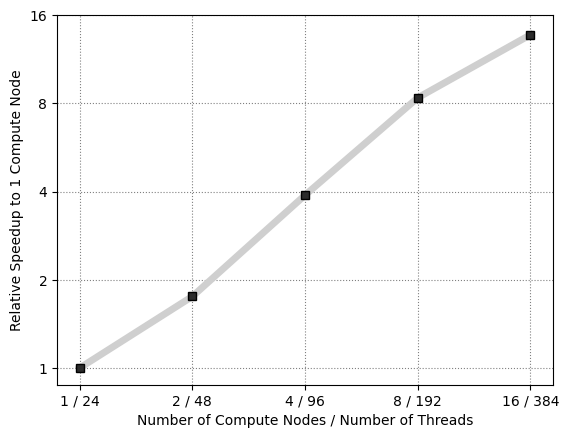

In [141]:
strong_scaling(save=save_all_plots)

In [142]:
def io_mpi_vs_original_speedup(save=False):
   experiment_name = 'graphfile-input'
   title = experiment_name

   sort_by = outputKeys.edge_count

   gdsb_mpi_io_filter = [(outputKeys.experiment_name, experiment_name), ('use_gdsb_mpi_io', 1)]
   gdsb_mpi_io_duration = extractExpFilter(gdsb_mpi_io_filter, key='graph_read_duration_ms', sort_by=sort_by)

   gdsb_original_io_filter = [(outputKeys.experiment_name, experiment_name), ('use_gdsb_mpi_io', 0)]
   gdsb_original_io_duration = extractExpFilter(gdsb_original_io_filter, key='graph_read_duration_ms', sort_by=sort_by)

   graph_edge_count = extractExpFilter(gdsb_mpi_io_filter, key='read_in_edge_count', sort_by=sort_by)

   gdsb_mpi_io_edges_per_ms = [count / duration if duration > 0 else count for duration, count in zip(gdsb_mpi_io_duration, graph_edge_count)]
   gdsb_origin_edges_per_ms = [count / duration if duration > 0 else count for duration, count in zip(gdsb_original_io_duration, graph_edge_count)]

   speedup = [mpi / origin for mpi, origin in zip(gdsb_mpi_io_edges_per_ms, gdsb_origin_edges_per_ms)]

   speedup_gm = statistics.geometric_mean(speedup)

   fig, ax = plt.subplots()

   graph_names = extractExpFilter(gdsb_mpi_io_filter, key=outputKeys.graph_name, sort_by=sort_by)

   ax.set_ylabel('I/O Speedup: MPI Binary vs Original Text')
   graph_names = abbreveations([remove_dot_data(name) for name in graph_names])
   x = np.arange(len(graph_names))

   width = 0.3
   ax.set_xticks(x)
   ax.set_xticklabels(graph_names, rotation=90)
   for i in range(len(speedup)):
      ax.bar(x[i], speedup[i], width, color=color_code(my_color_pallette.lead), align='center', edgecolor='black')
      
   # sets the grid to the background!
   ax.set_axisbelow(True)
   ax.grid(which='both', linestyle=':', color='grey')

   ax.set_xticks(x)
   ax.yaxis.set_major_formatter(plt.ScalarFormatter())

   if save:
      title = 'io_mpi_binary_vs_posix_origin'
      filename = compose_filename('results/plots', title)
      
      if write_tex_files:
         append_to_factor_file('speedupIOMPIVsOriginGM', speedup_gm)

      plt.savefig(filename, bbox_inches='tight')
   else:
      plt.show()  

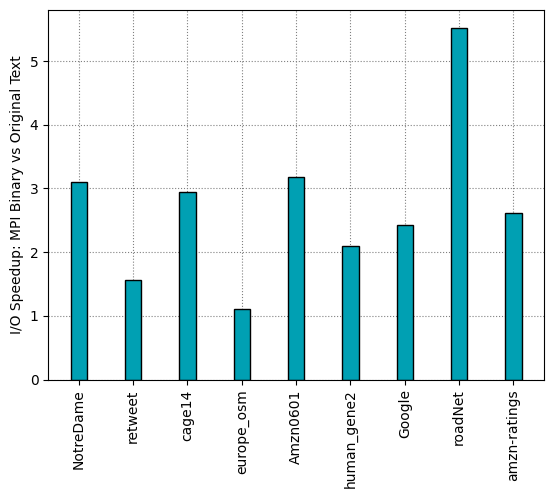

In [143]:
io_mpi_vs_original_speedup(save=save_all_plots)